<a href="https://colab.research.google.com/github/irfqn/MachineLearningTasks/blob/main/3rdweekTasks/DataIrisDecissionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Muhammad Irfan Al Rasyid - 1103200080**

In [1]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
import pandas as pd
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()

# Membuat DataFrame dari dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Menampilkan beberapa baris pertama dari DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Menggunakan metode unique() untuk mendapatkan nilai unik dalam kolom target
unique_targets = iris_df['target'].unique()

# Menampilkan nilai unik
print("Nilai unik dalam kolom 'target':", unique_targets)

Nilai unik dalam kolom 'target': [0 1 2]


In [11]:
# Nama kolom atribut
atribut_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Nama kolom target
target_column = 'target'

# Mendefinisikan DataFrame atribut dan target
atribut_df = iris_df[atribut_columns]
target_df = iris_df[target_column]

# Menampilkan beberapa baris pertama dari DataFrame atribut dan target
print("DataFrame atribut:")
print(atribut_df.head())

print("\nDataFrame target:")
print(target_df.head())

DataFrame atribut:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

DataFrame target:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [12]:
unique_sepal_length = iris_df['sepal length (cm)'].unique()
print("Nilai unik dalam kolom 'sepal length (cm)':", unique_sepal_length)

Nilai unik dalam kolom 'sepal length (cm)': [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]


In [13]:
iris_df['sepal width (cm)'].unique()
print("Nilai unik dalam kolom 'sepal width (cm)':", unique_sepal_length)

Nilai unik dalam kolom 'sepal width (cm)': [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pisahkan fitur-fitur (X) dan kolom target (y)
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Latih model dengan data latih
clf.fit(X_train, y_train)

# Prediksi kelas target pada data uji
y_pred = clf.predict(X_test)

# Evaluasi model dengan mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Decision Tree:", accuracy)

Akurasi Decision Tree: 1.0


In [15]:
# Mengimpor library yang diperlukan
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Memisahkan kolom atribut dan kolom target
atribut_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_column = 'target'

X = iris_df[atribut_columns]
y = iris_df[target_column]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Memprediksi target menggunakan data uji
y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Decision Tree: {accuracy * 100:.2f}%")

Akurasi model Decision Tree: 100.00%


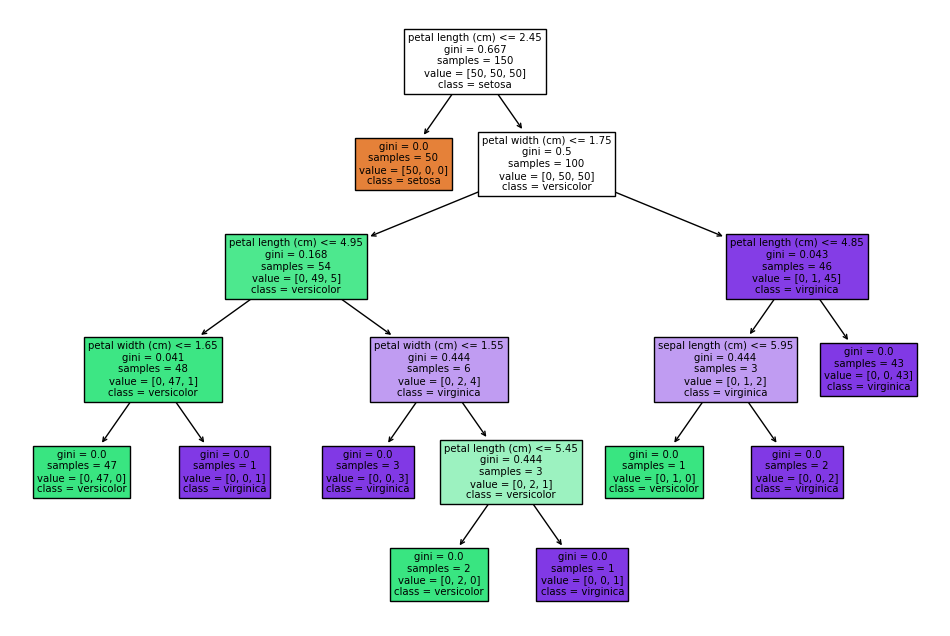

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Membuat model Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Menampilkan grafik pohon keputusan dengan matplotlib
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Memuat dataset Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Pembagian data dengan random_state
X_train_with_rs, X_test_with_rs, y_train_with_rs, y_test_with_rs = train_test_split(
    iris_df[iris.feature_names], iris_df['target'], test_size=0.2, random_state=42)

# Pembagian data tanpa random_state
X_train_no_rs, X_test_no_rs, y_train_no_rs, y_test_no_rs = train_test_split(
    iris_df[iris.feature_names], iris_df['target'], test_size=0.2)

# Menampilkan tabelnya menggunakan kolom yang diminta
print("Pembagian data dengan random_state:")
with_rs_df = pd.DataFrame({'sepal length (cm)': X_test_with_rs['sepal length (cm)'],
                            'sepal width (cm)': X_test_with_rs['sepal width (cm)'],
                            'petal length (cm)': X_test_with_rs['petal length (cm)'],
                            'petal width (cm)': X_test_with_rs['petal width (cm)'],
                            'target': y_test_with_rs})
print(with_rs_df.head())

print("\nPembagian data tanpa random_state:")
no_rs_df = pd.DataFrame({'sepal length (cm)': X_test_no_rs['sepal length (cm)'],
                        'sepal width (cm)': X_test_no_rs['sepal width (cm)'],
                        'petal length (cm)': X_test_no_rs['petal length (cm)'],
                        'petal width (cm)': X_test_no_rs['petal width (cm)'],
                        'target': y_test_no_rs})
print(no_rs_df.head())

Pembagian data dengan random_state:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
73                 6.1               2.8                4.7               1.2   
18                 5.7               3.8                1.7               0.3   
118                7.7               2.6                6.9               2.3   
78                 6.0               2.9                4.5               1.5   
76                 6.8               2.8                4.8               1.4   

     target  
73        1  
18        0  
118       2  
78        1  
76        1  

Pembagian data tanpa random_state:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
38                4.4               3.0                1.3               0.2   
5                 5.4               3.9                1.7               0.4   
21                5.1               3.7                1.5               0.4   
85                6.0               3